# Visualizing Economic Trends and Market Indicators

Notebook created: April 10, 2023

This project focuses on analyzing economic trends through various visualizations of key financial metrics and market indicators. It includes visual explorations of monetary policy, such as changes in the federal funds target rate and M2 money supply, as well as market indicators such as the S&P 500 and the dollar index.

The project also includes an emphasis on percentage changes and comparisons across different time periods, allowing for a deeper understanding of how economic trends have evolved over time.

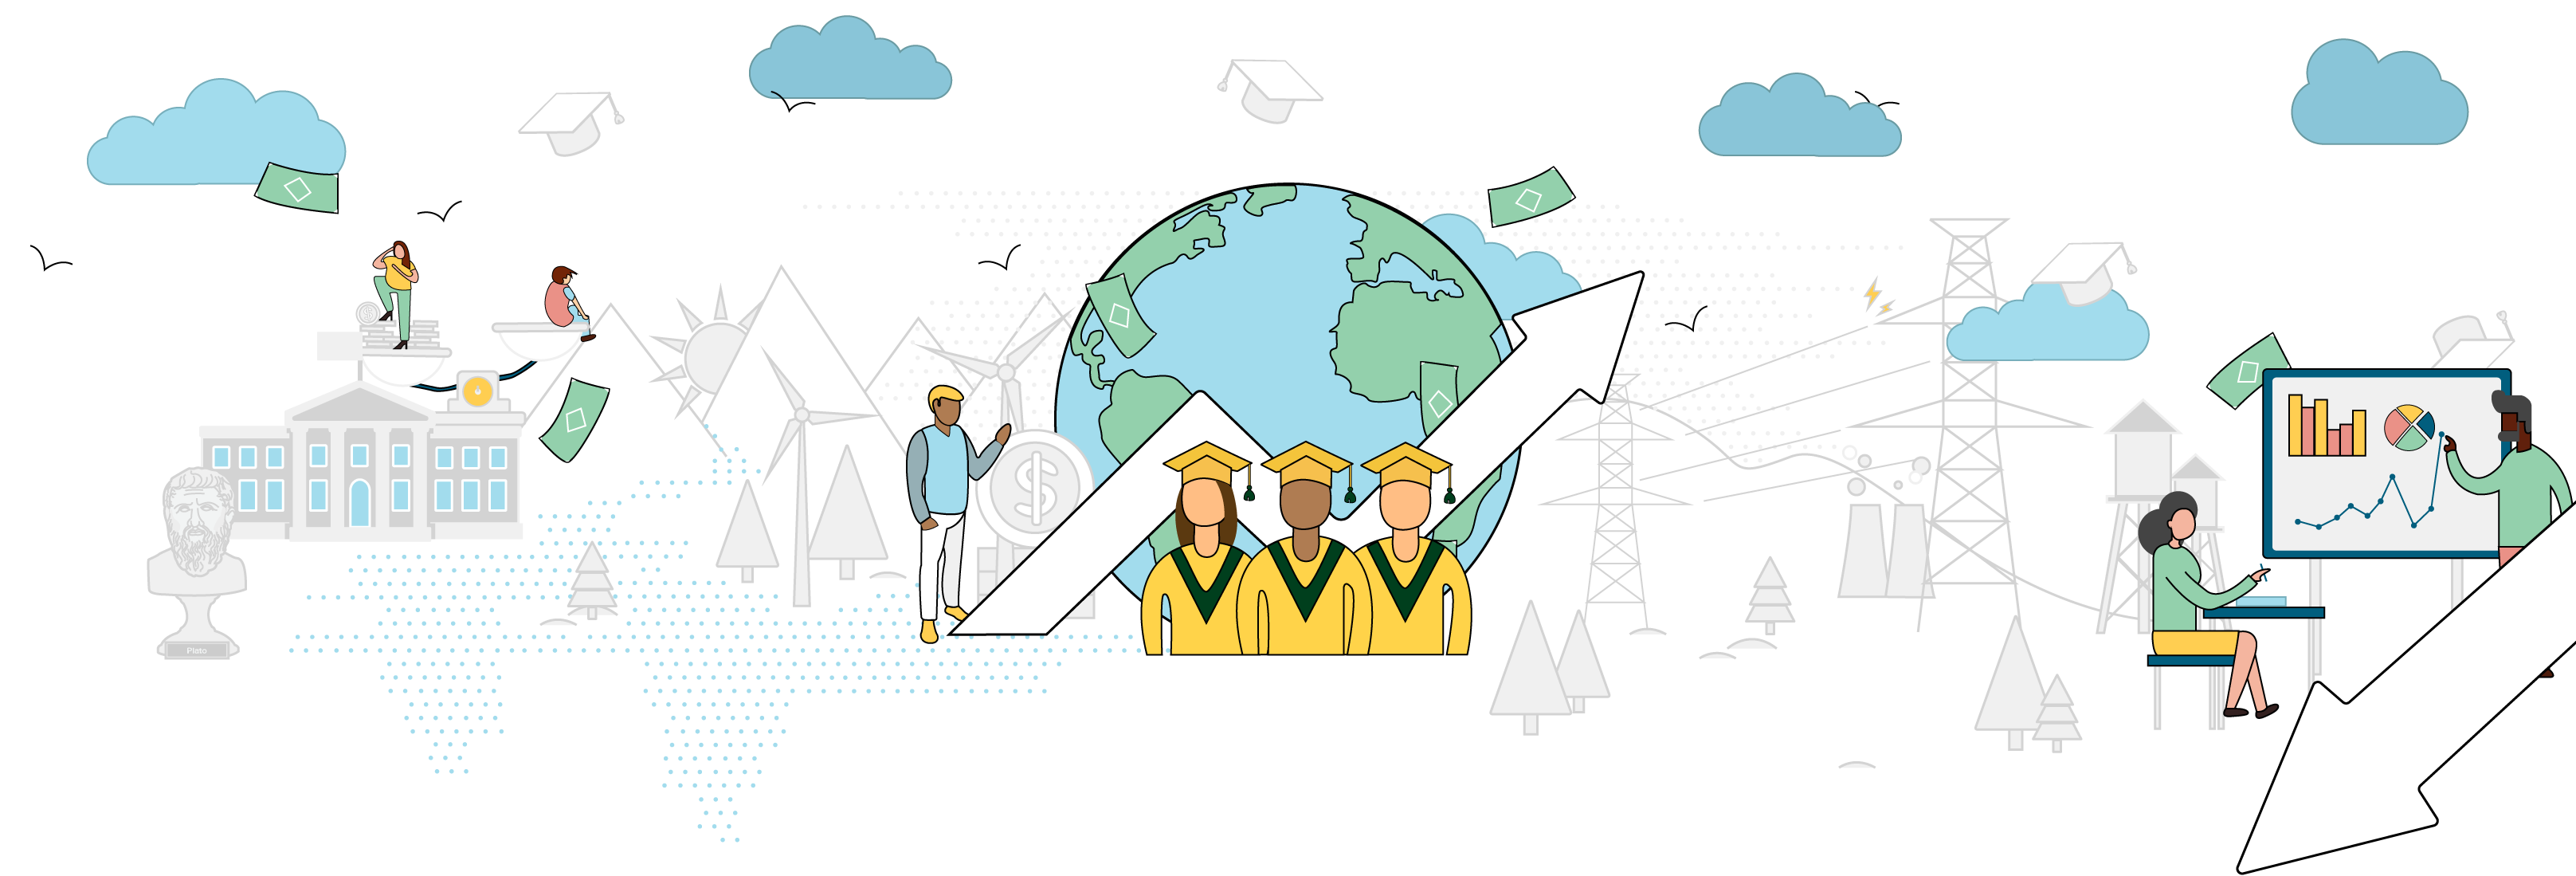

In [1]:
import pandas_datareader.data as web
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np
import yfinance as yf
import math

## Fed Target Rate

In [2]:
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime.now()

Fed_Target_Rate = web.DataReader("DFF", "fred", start , end)
print(Fed_Target_Rate.tail())

             DFF
DATE            
2023-04-02  4.83
2023-04-03  4.83
2023-04-04  4.83
2023-04-05  4.83
2023-04-06  4.83


<Axes: title={'center': 'Fed Target Rate'}, xlabel='DATE'>

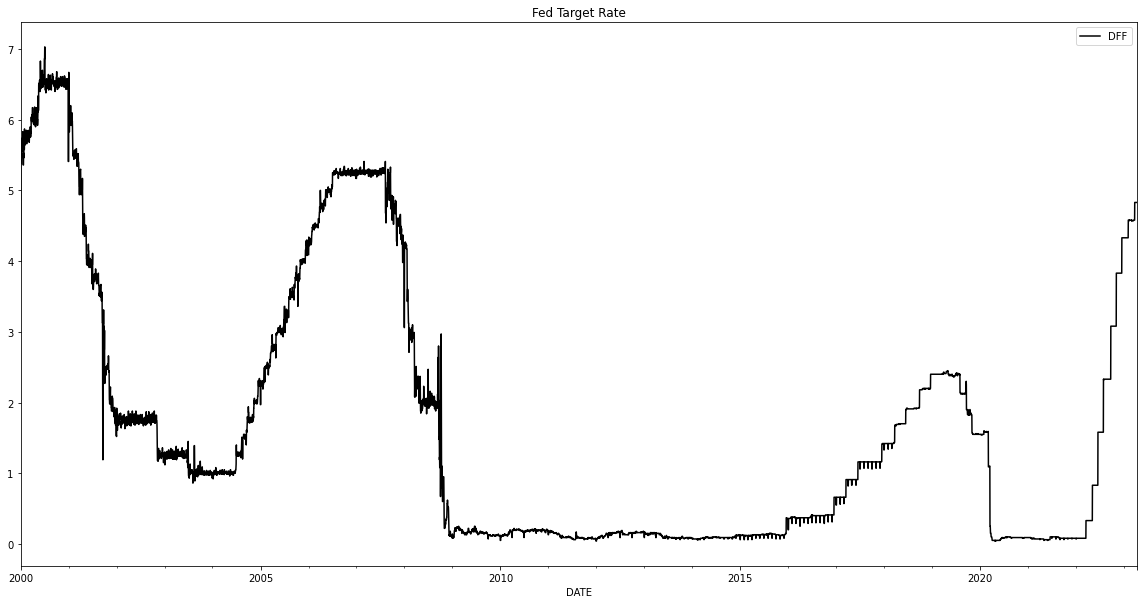

In [3]:
Fed_Target_Rate.plot(title="Fed Target Rate", figsize=(20,10),color='black')

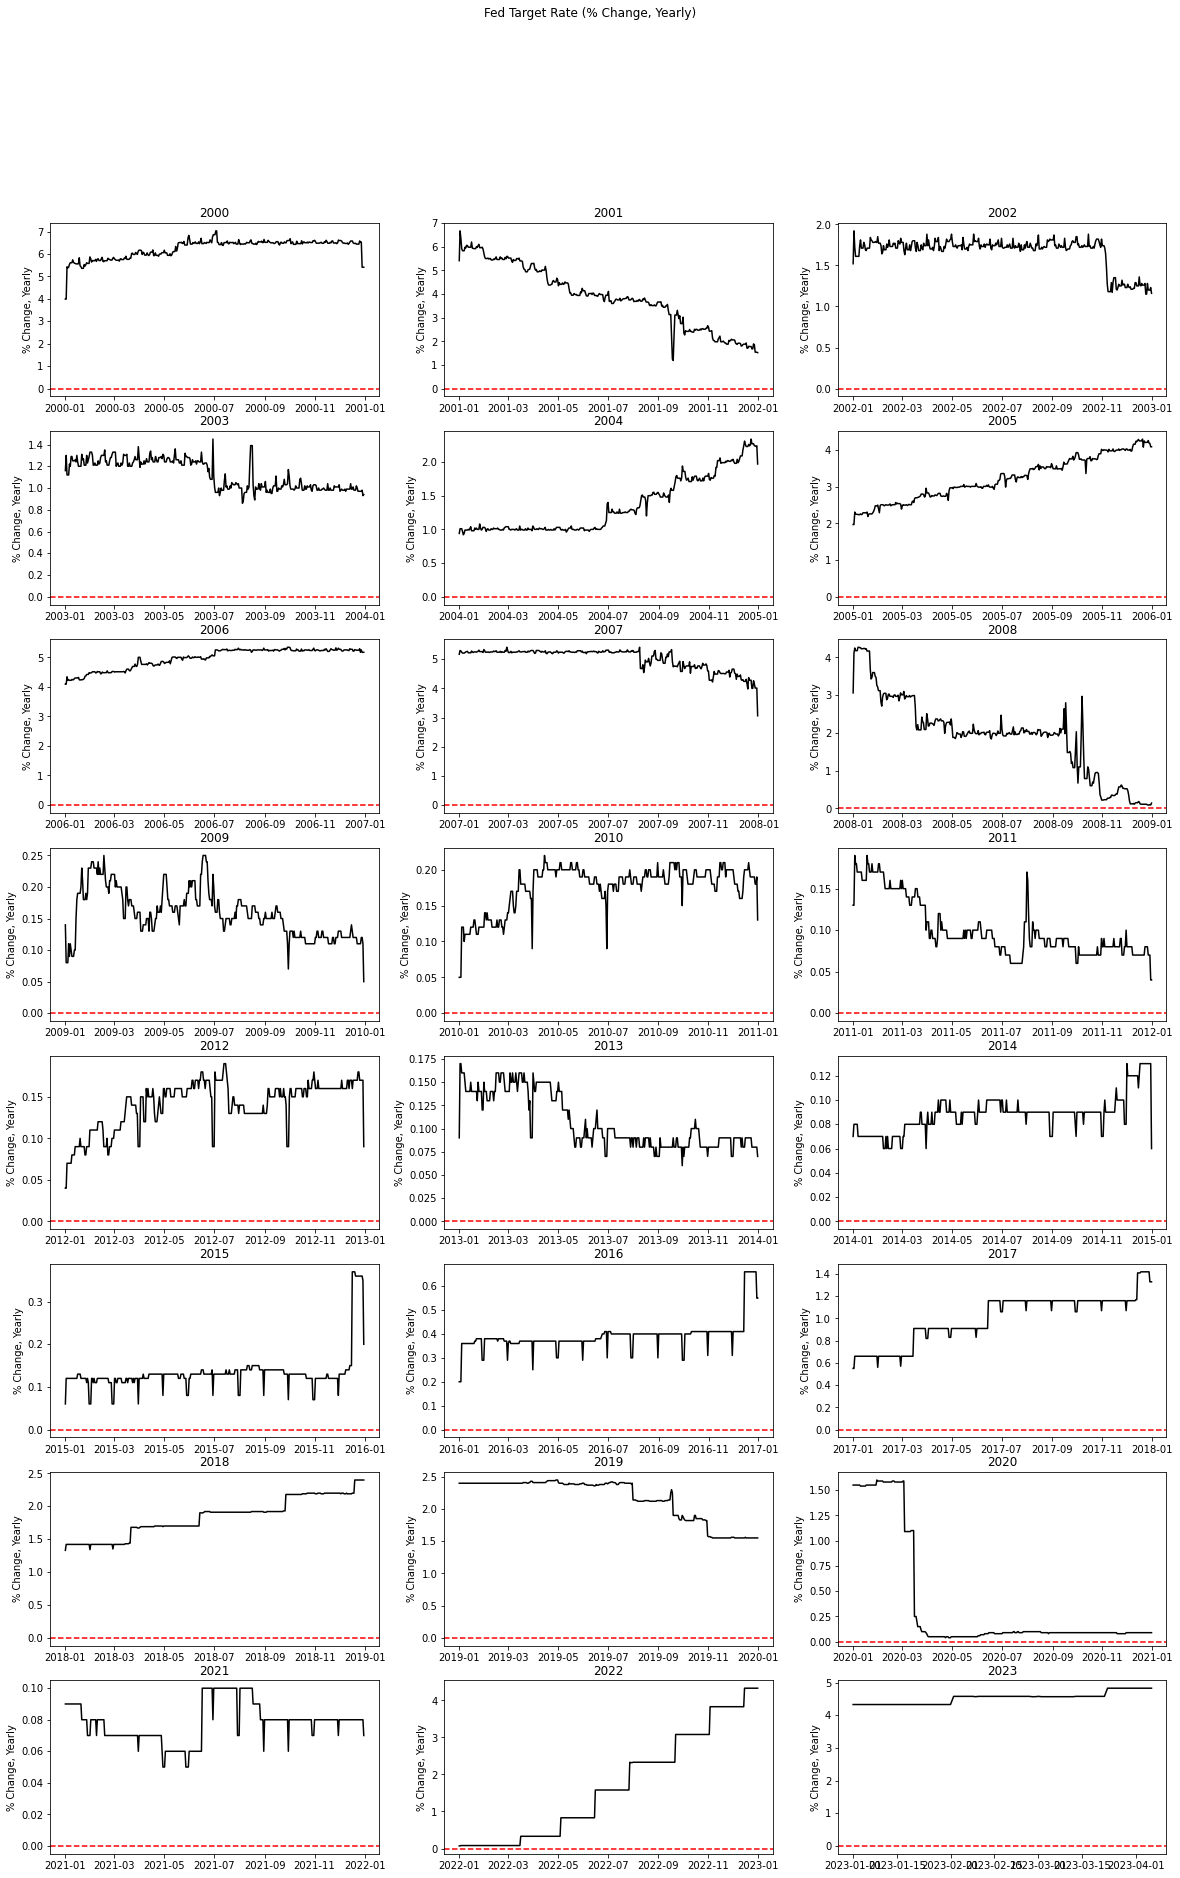

In [4]:
yearly_data = Fed_Target_Rate.groupby(pd.Grouper(freq='Y'))
fig, axes = plt.subplots(nrows=math.ceil(len(yearly_data)/3), ncols=3, figsize=(20, 30))

for i, (year, year_data) in enumerate(yearly_data):
    ax = axes[i//3, i%3]
    ax.plot(year_data.index, year_data.values, label=f'{year.year}', color='black')
    ax.axhline(y=0, color='red', linestyle='--')
    ax.set_title(f'{year.year}')
    ax.set_ylabel('% Change, Yearly')

fig.suptitle('Fed Target Rate (% Change, Yearly)')

plt.show()

## 10-Year Treasury Yield

In [32]:
treasury_yield = web.DataReader("DGS10", "fred", start, end)
treasury_yield.tail

<bound method NDFrame.tail of             DGS10
DATE             
2000-01-03   6.58
2000-01-04   6.49
2000-01-05   6.62
2000-01-06   6.57
2000-01-07   6.52
...           ...
2023-03-31   3.48
2023-04-03   3.43
2023-04-04   3.35
2023-04-05   3.30
2023-04-06   3.30

[6069 rows x 1 columns]>

<Axes: title={'center': '10-Year Treasury Yield'}, xlabel='DATE'>

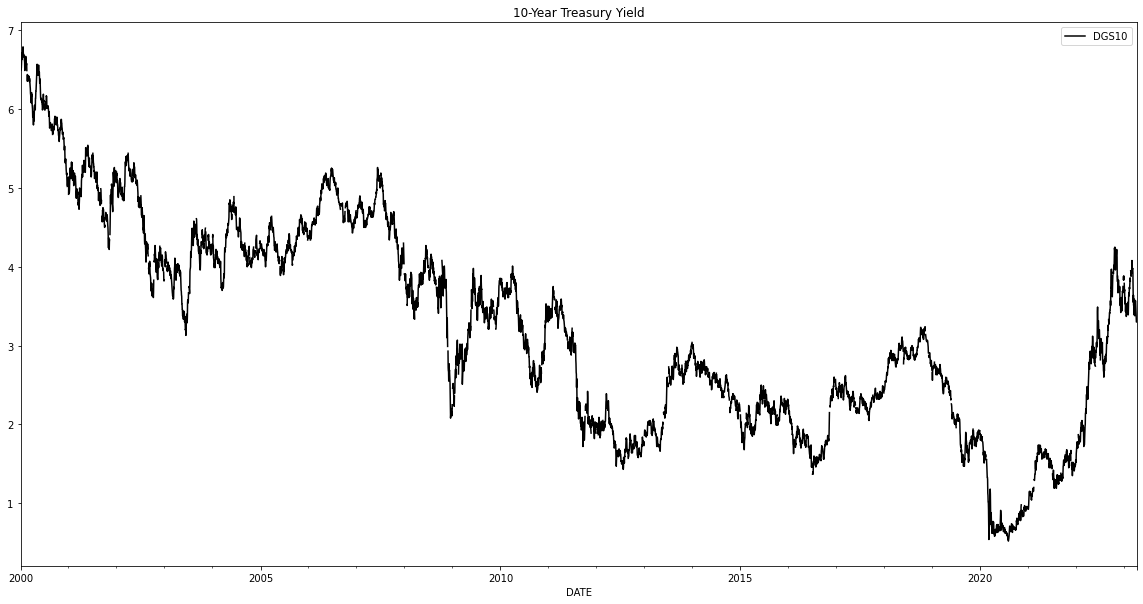

In [5]:
treasury_yield.plot(title="10-Year Treasury Yield", figsize=(20,10), color='black')

## Borrowings, All Commercial Banks

In [33]:
borrowings = web.DataReader("H8B3094NCBA", "fred", start, end)
borrowings.tail

<bound method NDFrame.tail of             H8B3094NCBA
DATE                   
2000-01-05    1360296.4
2000-01-12    1381594.9
2000-01-19    1352571.7
2000-01-26    1355312.3
2000-02-02    1362224.2
...                 ...
2023-03-01    1964593.2
2023-03-08    1947295.0
2023-03-15    2490728.4
2023-03-22    2517353.0
2023-03-29    2493350.4

[1213 rows x 1 columns]>

<Axes: title={'center': 'Borrowings, All Commercial Banks'}, xlabel='DATE'>

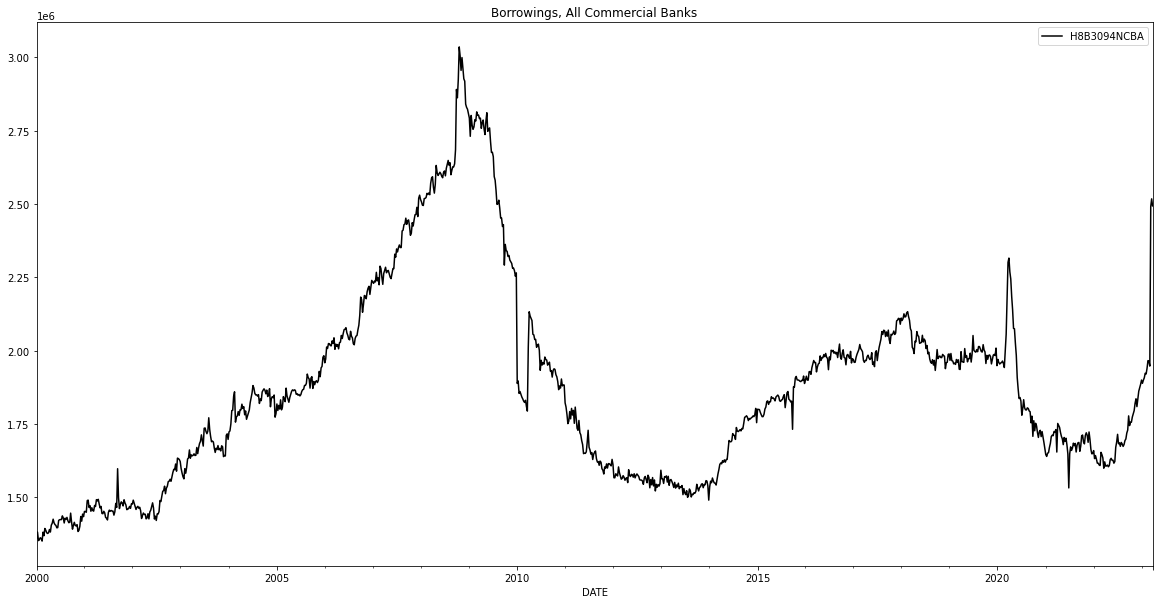

In [34]:
borrowings.plot(title="Borrowings, All Commercial Banks", figsize=(20,10), color='black')

## 2-Year / 10-Year / 30-Year

In [36]:
data = web.DataReader(['DGS2', 'DGS10', 'DGS30'], 'fred', start, end)

In [37]:
data.tail

<bound method NDFrame.tail of             DGS2  DGS10  DGS30
DATE                          
2000-01-03  6.38   6.58   6.61
2000-01-04  6.30   6.49   6.53
2000-01-05  6.38   6.62   6.64
2000-01-06  6.35   6.57   6.58
2000-01-07  6.31   6.52   6.55
...          ...    ...    ...
2023-03-31  4.06   3.48   3.67
2023-04-03  3.97   3.43   3.64
2023-04-04  3.84   3.35   3.60
2023-04-05  3.79   3.30   3.56
2023-04-06  3.82   3.30   3.54

[6069 rows x 3 columns]>

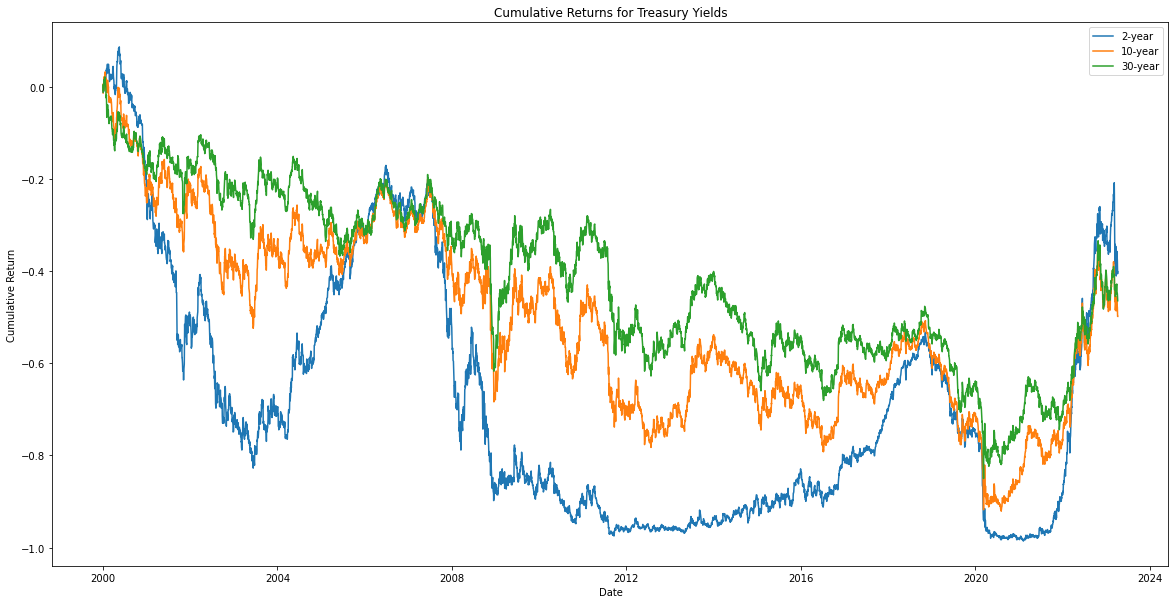

In [8]:
data = data.dropna()
returns = data.pct_change()
cumulative_returns = (1 + returns).cumprod() - 1

plt.figure(figsize=(20,10))
plt.plot(cumulative_returns)
plt.legend(['2-year', '10-year', '30-year'])
plt.title('Cumulative Returns for Treasury Yields')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.show()

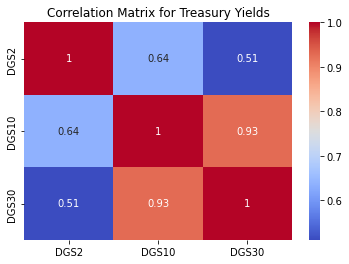

In [9]:
correlation_matrix = returns.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Treasury Yields')
plt.show()

## 2-year Treasury Yield vs. Fed Funds Target Range - Upper Limit / Fed Funds Target Rate

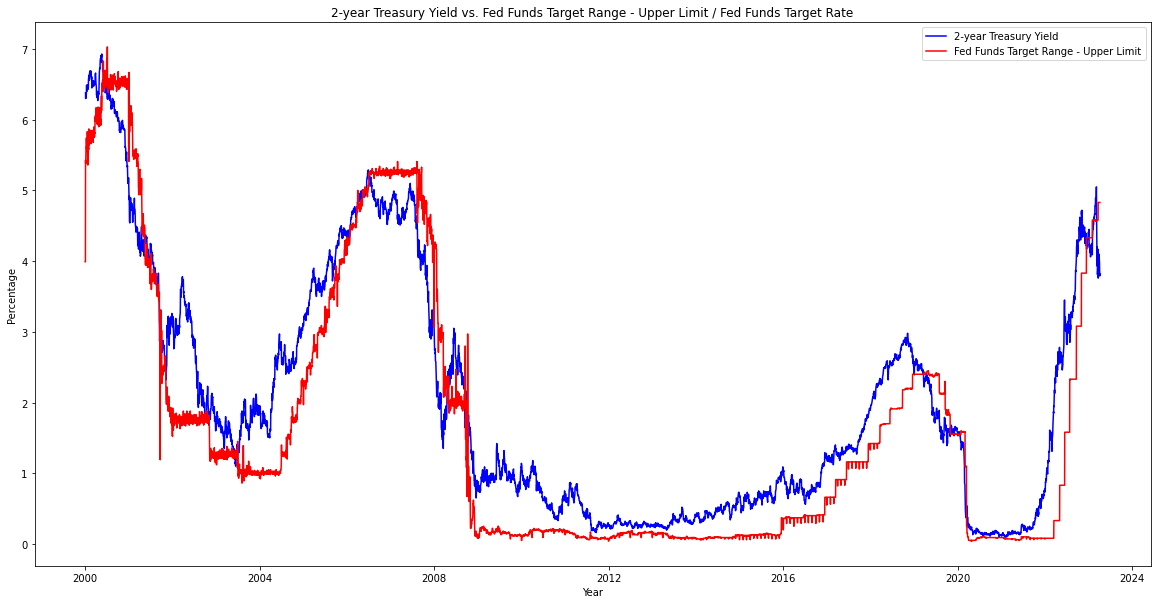

In [10]:
data5 = pd.concat([data, Fed_Target_Rate], axis=1)
data5 = data.dropna()

fig, ax = plt.subplots(figsize=(20,10))
ax.plot(data5.index, data5['DGS2'], label='2-year Treasury Yield', color='blue')
ax.plot(Fed_Target_Rate.index, Fed_Target_Rate['DFF'], label='Fed Funds Target Range - Upper Limit', color='red')
ax.set_xlabel('Year')
ax.set_ylabel('Percentage')
ax.set_title('2-year Treasury Yield vs. Fed Funds Target Range - Upper Limit / Fed Funds Target Rate')
ax.legend()
plt.show()

In [ ]:
## Fed Target Rate / S&P500 / 10-Y Treasyr

In [11]:
spx = yf.download('^GSPC', start, end, progress=False)['Adj Close']
nsei = yf.download('^bsesn', start, end, progress=False)['Adj Close']

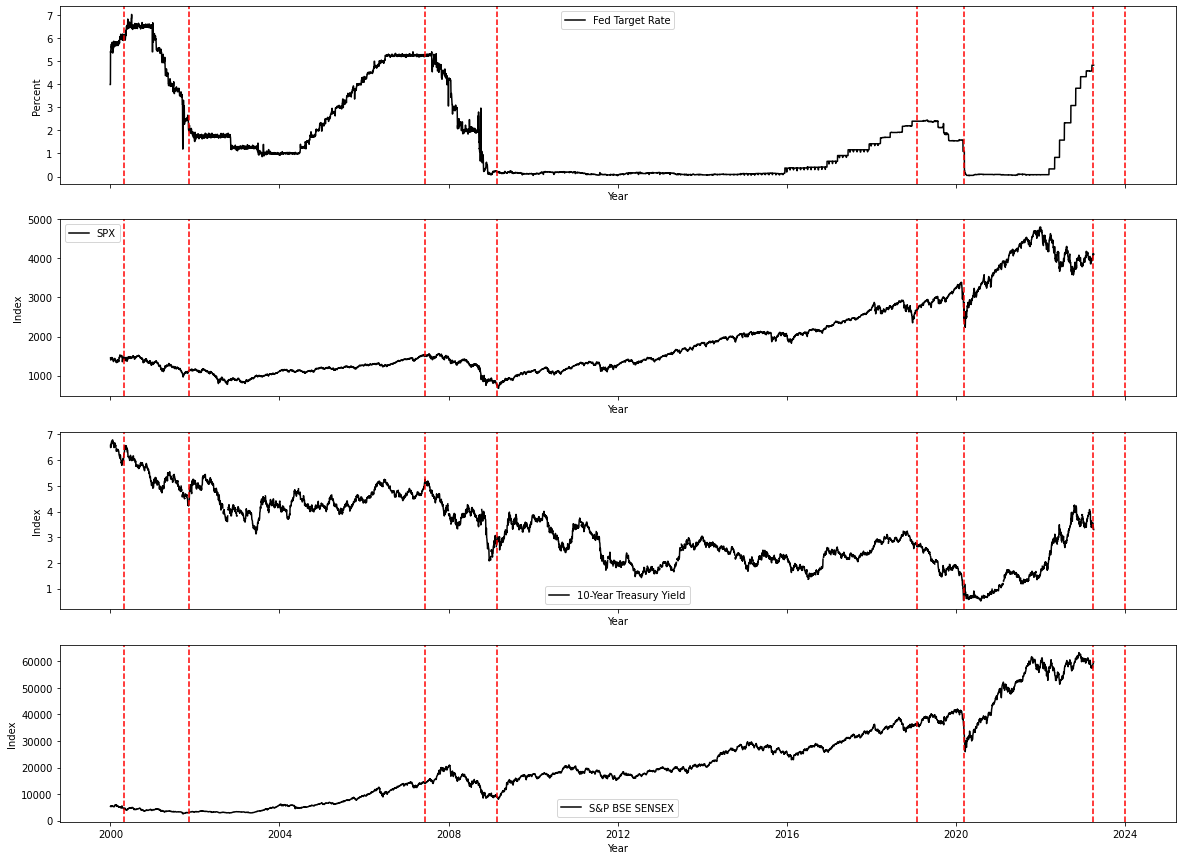

In [12]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20,15), sharex=True)

# plot the Fed target rate chart on the top subplot
ax1.plot(Fed_Target_Rate, color='black')
ax1.axvline(pd.to_datetime('2000-05-01'), color='r', linestyle='--')
ax1.axvline(pd.to_datetime('2001-11-12'), color='r', linestyle='--')
ax1.axvline(pd.to_datetime('2007-06-12'), color='r', linestyle='--')
ax1.axvline(pd.to_datetime('2009-02-25'), color='r', linestyle='--')
ax1.axvline(pd.to_datetime('2019-01-31'), color='r', linestyle='--')
ax1.axvline(pd.to_datetime('2020-03-09'), color='r', linestyle='--')
ax1.axvline(pd.to_datetime('2024-01-01'), color='r', linestyle='--')
ax1.axvline(pd.to_datetime('2023-04-01'), color='r', linestyle='--')
ax1.set_xlabel('Year')
ax1.set_ylabel('Percent')
ax1.legend(['Fed Target Rate'])

# plot the SPX chart on the second subplot
ax2.plot(spx, color='black')
ax2.axvline(pd.to_datetime('2000-05-01'), color='r', linestyle='--')
ax2.axvline(pd.to_datetime('2001-11-12'), color='r', linestyle='--')
ax2.axvline(pd.to_datetime('2007-06-12'), color='r', linestyle='--')
ax2.axvline(pd.to_datetime('2009-02-25'), color='r', linestyle='--')
ax2.axvline(pd.to_datetime('2019-01-31'), color='r', linestyle='--')
ax2.axvline(pd.to_datetime('2020-03-09'), color='r', linestyle='--')
ax2.axvline(pd.to_datetime('2024-01-01'), color='r', linestyle='--')
ax2.axvline(pd.to_datetime('2023-04-01'), color='r', linestyle='--')
ax2.set_xlabel('Year')
ax2.set_ylabel('Index')
ax2.legend(['SPX'])

# plot the 10-Year Treasury Yield chart on the third subplot
ax3.plot(treasury_yield, color='black')
ax3.axvline(pd.to_datetime('2000-05-01'), color='r', linestyle='--')
ax3.axvline(pd.to_datetime('2001-11-12'), color='r', linestyle='--')
ax3.axvline(pd.to_datetime('2007-06-12'), color='r', linestyle='--')
ax3.axvline(pd.to_datetime('2009-02-25'), color='r', linestyle='--')
ax3.axvline(pd.to_datetime('2019-01-31'), color='r', linestyle='--')
ax3.axvline(pd.to_datetime('2020-03-09'), color='r', linestyle='--')
ax3.axvline(pd.to_datetime('2024-01-01'), color='r', linestyle='--')
ax3.axvline(pd.to_datetime('2023-04-01'), color='r', linestyle='--')
ax3.set_xlabel('Year')
ax3.set_ylabel('Index')
ax3.legend(['10-Year Treasury Yield'])

# plot the S&P BSE SENSEX chart on the fourth subplot
ax4.plot(nsei, color='black')
ax4.axvline(pd.to_datetime('2000-05-01'), color='r', linestyle='--')
ax4.axvline(pd.to_datetime('2001-11-12'), color='r', linestyle='--')
ax4.axvline(pd.to_datetime('2007-06-12'), color='r', linestyle='--')
ax4.axvline(pd.to_datetime('2009-02-25'), color='r', linestyle='--')
ax4.axvline(pd.to_datetime('2019-01-31'), color='r', linestyle='--')
ax4.axvline(pd.to_datetime('2020-03-09'), color='r', linestyle='--')
ax4.axvline(pd.to_datetime('2024-01-01'), color='r', linestyle='--')
ax4.axvline(pd.to_datetime('2023-04-01'), color='r', linestyle='--')
ax4.set_xlabel('Year')
ax4.set_ylabel('Index')
ax4.legend(['S&P BSE SENSEX'])

plt.savefig('chart.png')
plt.show()

## Share of Corporate Equities and Mutual Fund Shares Held by Wealth Percentiles

In [13]:
wealth_50_to_90 = web.DataReader("WFRBSN40176", "fred", start, end)
wealth_90_to_99 = web.DataReader("WFRBSN09149", "fred", start, end)
wealth_99_to_100 = web.DataReader("WFRBST01122", "fred", start, end)

wealth_data = pd.concat([wealth_50_to_90, wealth_90_to_99, wealth_99_to_100], axis=1)
wealth_data.columns = ['50th to 90th percentile', '90th to 99th percentile', '99th to 100th percentile']

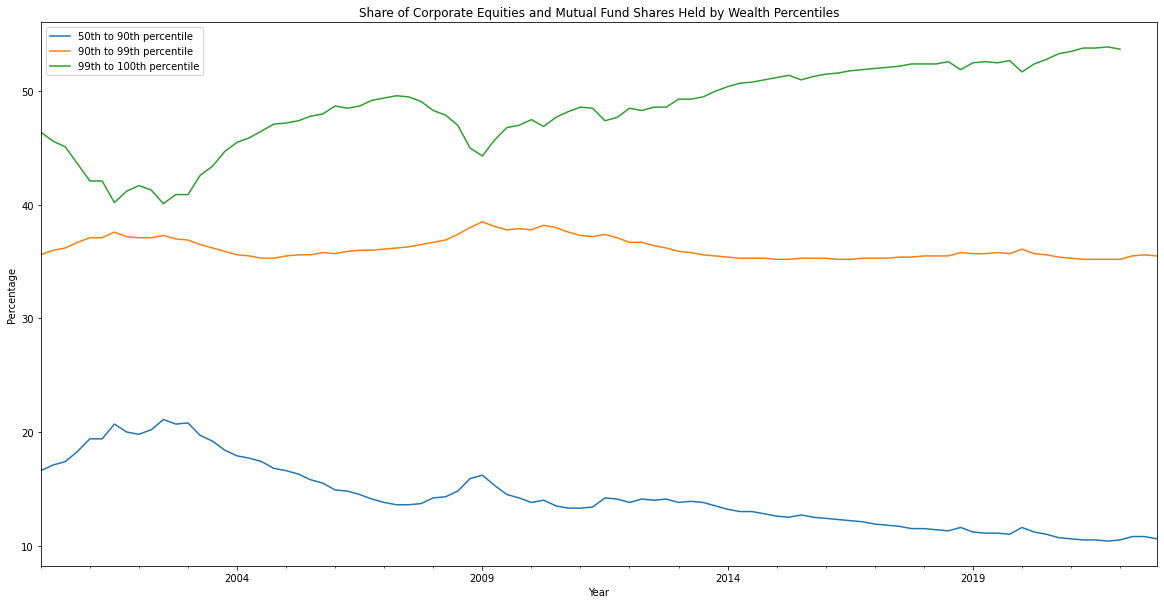

In [14]:
wealth_data.plot(figsize=(20,10))

plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Share of Corporate Equities and Mutual Fund Shares Held by Wealth Percentiles')
plt.legend()
plt.show()

## 10-Year Minus 2-Year Treasury Constant Maturity / Unemployment Rate

In [15]:
start1 = datetime.datetime(1990, 1, 1)
end1 = datetime.datetime.now()

TY = web.DataReader("T10Y2Y", "fred", start1, end1)
Unemployment_Rate = web.DataReader("UNRATE", "fred", start1, end1)

data = pd.concat([TY, Unemployment_Rate], axis=1)
data.columns = ['10-Year Treasury Constant Maturity Minus 2-Year Treasury Constant Maturity', 'Unemployment Rate']

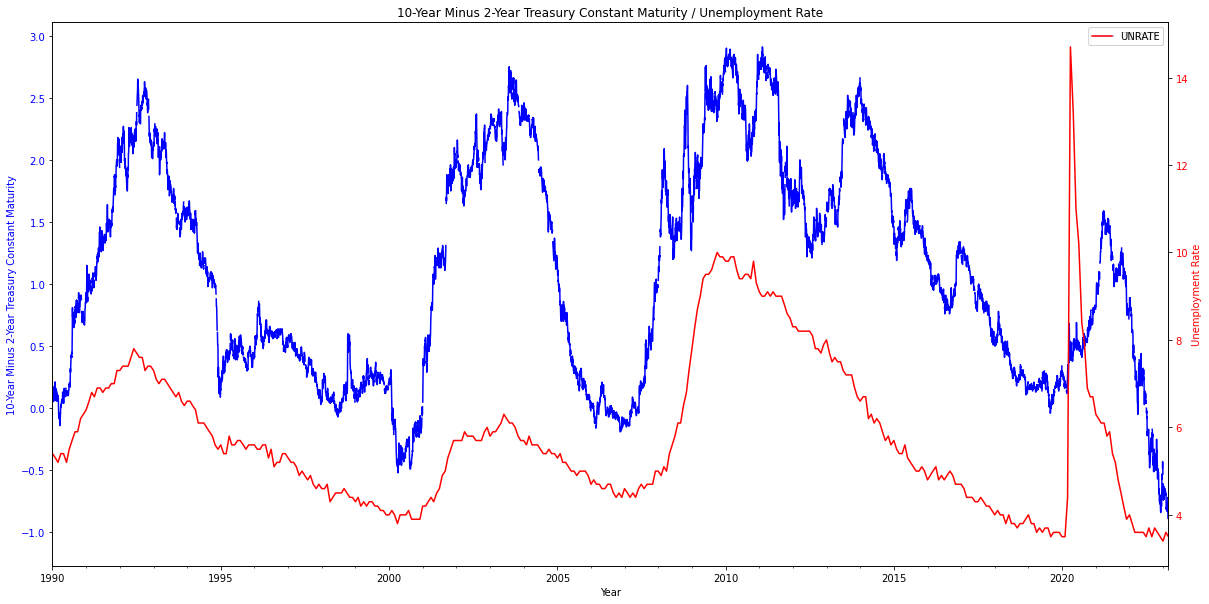

In [16]:
fig, ax1 = plt.subplots(figsize=(20,10))

TY.plot(ax=ax1, color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('10-Year Minus 2-Year Treasury Constant Maturity', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
Unemployment_Rate.plot(ax=ax2, color='red')
ax2.set_ylabel('Unemployment Rate', color='red')
ax2.tick_params(axis='y', labelcolor='red')
plt.title('10-Year Minus 2-Year Treasury Constant Maturity / Unemployment Rate')
plt.legend()
plt.show()

## Fed Target Rate / Unemployment Rate

In [17]:
Fed_Target_Rate = web.DataReader("DFF", "fred", start1 , end1)

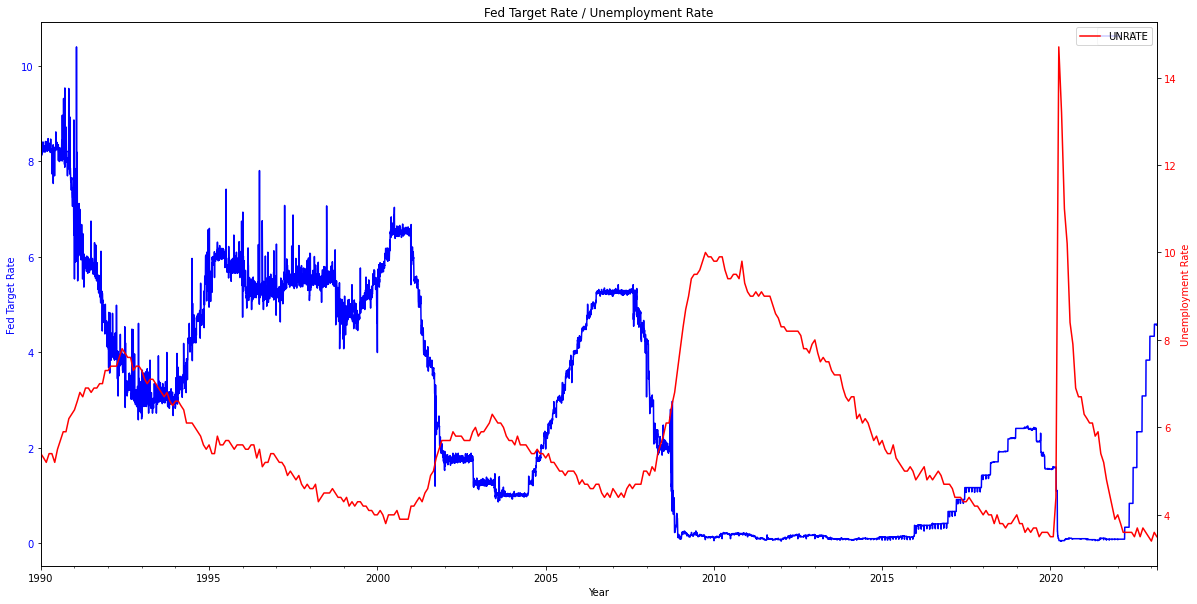

In [18]:
fig, ax1 = plt.subplots(figsize=(20,10))
Fed_Target_Rate.plot(ax=ax1, color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Fed Target Rate', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax2 = ax1.twinx()

Unemployment_Rate.plot(ax=ax2, color='red')
ax2.set_ylabel('Unemployment Rate', color='red')
ax2.tick_params(axis='y', labelcolor='red')
plt.title('Fed Target Rate / Unemployment Rate')
plt.legend()
plt.show()

## Fed Target Rate / Trimmed Mean PCE Inflation Rate

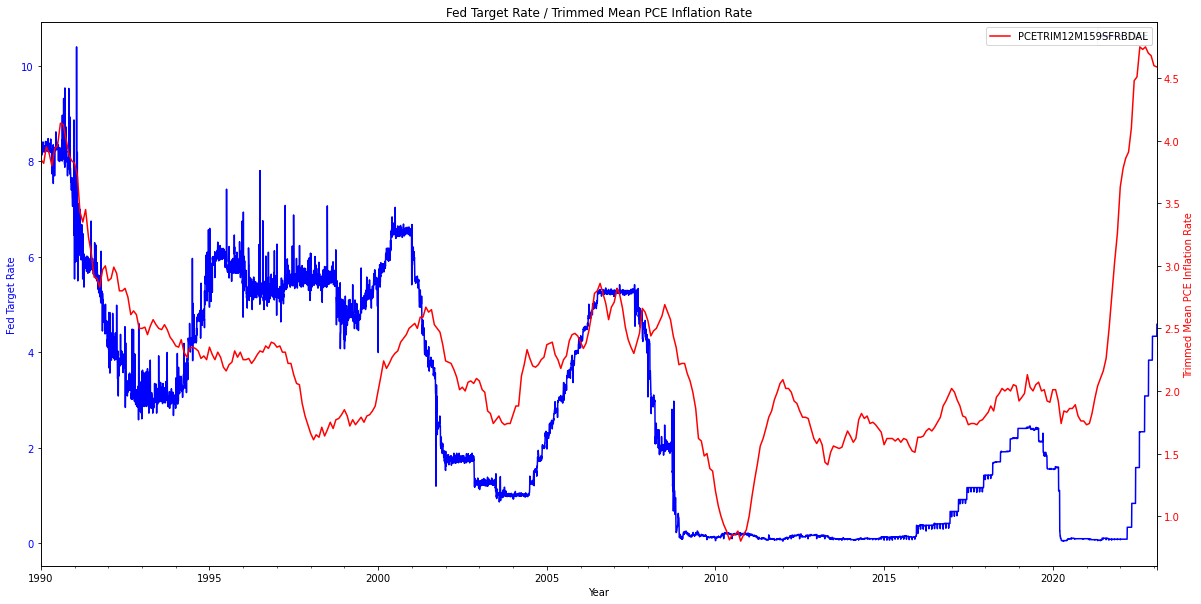

In [19]:
PCE = web.DataReader("PCETRIM12M159SFRBDAL", "fred", start1 , end1)
PCE.tail

fig, ax1 = plt.subplots(figsize=(20,10))
Fed_Target_Rate.plot(ax=ax1, color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Fed Target Rate', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax2 = ax1.twinx()
PCE.plot(ax=ax2, color='red')
ax2.set_ylabel('Trimmed Mean PCE Inflation Rate', color='red')
ax2.tick_params(axis='y', labelcolor='red')
plt.title('Fed Target Rate / Trimmed Mean PCE Inflation Rate')
plt.legend()
plt.show()

## Fed Target Rate / Producer Price Index by Commodity: All Commodities

In [20]:
start2 = datetime.datetime(1970, 1, 1)
end2 = datetime.datetime.now()

Commodities = web.DataReader("PPIACO", "fred", start2 , end2)
Fed_Target_Rate = web.DataReader("DFF", "fred", start2 , end2)

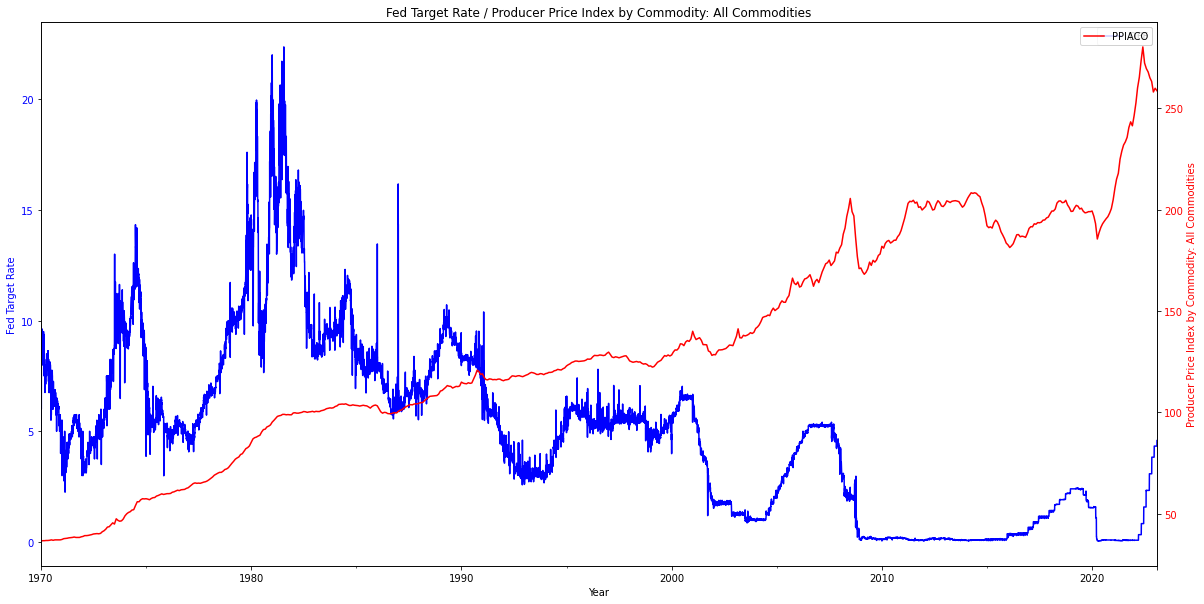

In [21]:
fig, ax1 = plt.subplots(figsize=(20,10))
Fed_Target_Rate.plot(ax=ax1, color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Fed Target Rate', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax2 = ax1.twinx()
Commodities.plot(ax=ax2, color='red')
ax2.set_ylabel('Producer Price Index by Commodity: All Commodities', color='red')
ax2.tick_params(axis='y', labelcolor='red')
plt.title('Fed Target Rate / Producer Price Index by Commodity: All Commodities')
plt.legend()
plt.show()

## Assets: Liquidity and Credit Facilities: Loans: Primary Credit: Wednesday Level / Fed Target Rate

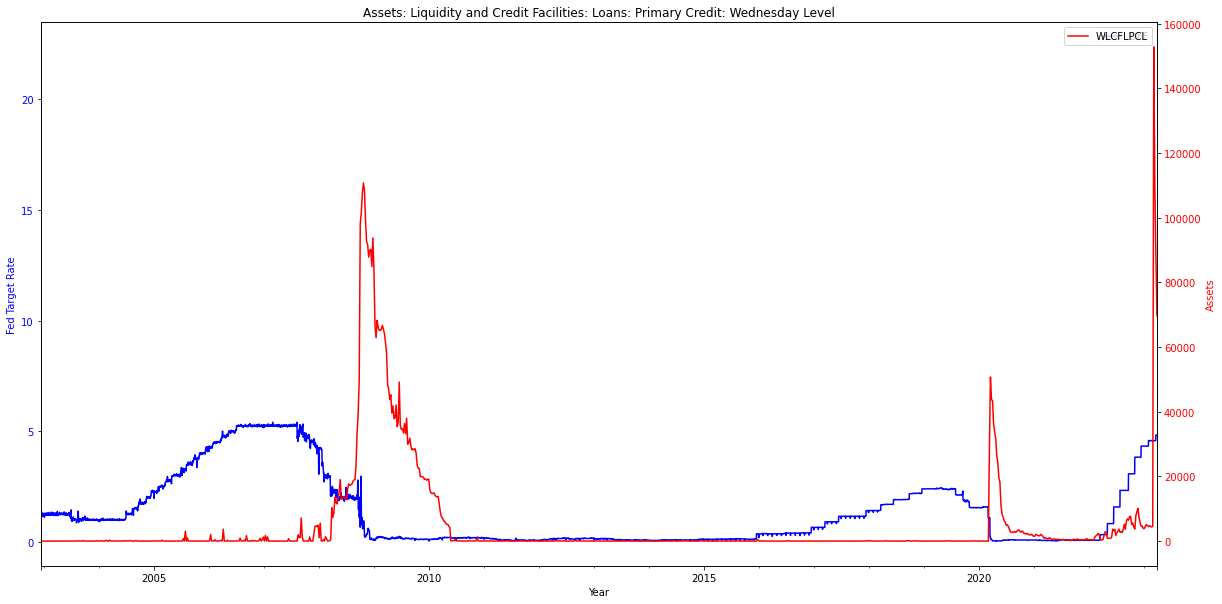

In [22]:
start3 = datetime.datetime(2000, 1, 1)
end3 = datetime.datetime.now()

Assets = web.DataReader("WLCFLPCL", "fred", start2 , end2)
Fed_Target_Rate = web.DataReader("DFF", "fred", start2 , end2)

fig, ax1 = plt.subplots(figsize=(20,10))
Fed_Target_Rate.plot(ax=ax1, color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Fed Target Rate', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax2 = ax1.twinx()
Assets.plot(ax=ax2, color='red')
ax2.set_ylabel('Assets', color='red')
ax2.tick_params(axis='y', labelcolor='red')
plt.title('Assets: Liquidity and Credit Facilities: Loans: Primary Credit: Wednesday Level')
plt.legend()
plt.show()

## Real M2 Money Supply

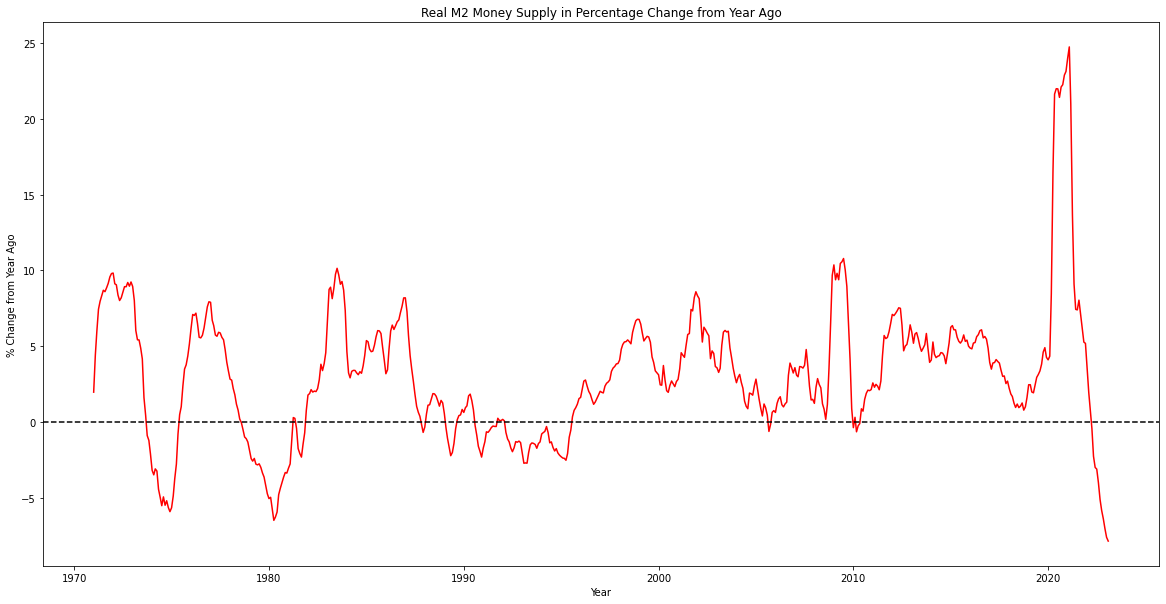

In [23]:
real_m2 = web.DataReader("M2REAL", "fred", start2 , end2)

# calculate percentage change from a year ago
pct_change = (real_m2 / real_m2.shift(12) - 1) * 100

fig, ax = plt.subplots(figsize=(20,10))
ax.plot(pct_change.index, pct_change, color='red')
ax.axhline(y=0, color='black', linestyle='--')
ax.set_xlabel('Year')
ax.set_ylabel('% Change from Year Ago')
plt.title('Real M2 Money Supply in Percentage Change from Year Ago')
plt.show()

## Nasdaq 100 / Fed Balance Sheet

In [24]:
start4 = datetime.datetime(2015, 1, 1)
end4 = datetime.datetime.now()

balance_sheet = web.DataReader("WALCL", "fred", start4 , end4)
nasdaq = yf.download('^NDX', start4, end4, progress=False)['Adj Close']

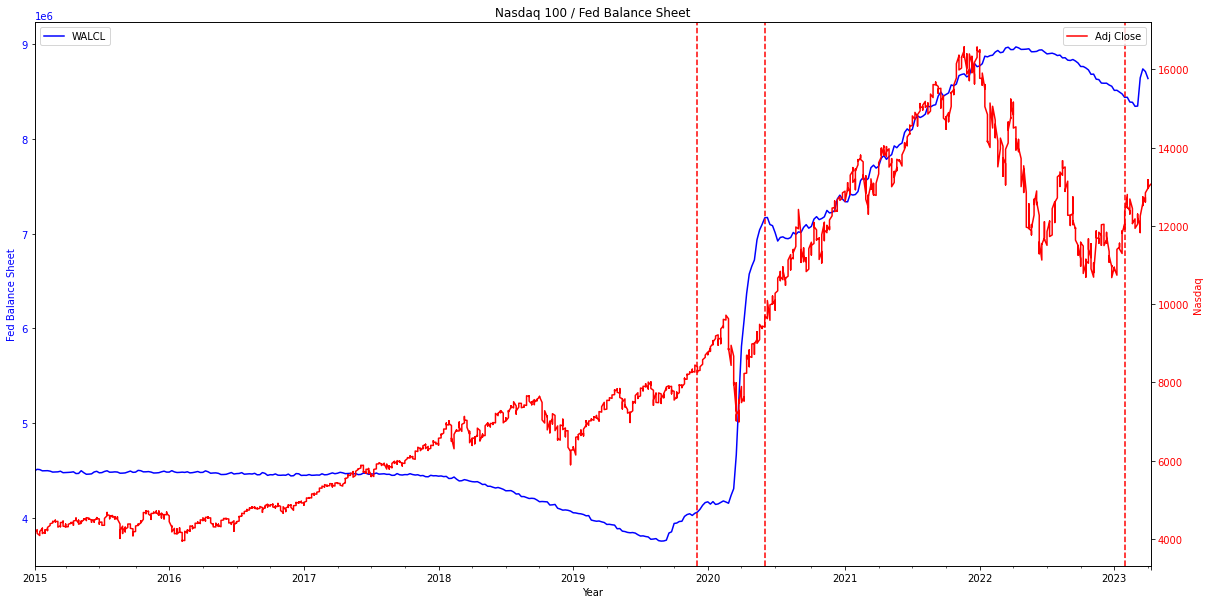

In [25]:
fig, ax1 = plt.subplots(figsize=(20,10))
balance_sheet.plot(ax=ax1, color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Fed Balance Sheet', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.axvline(pd.to_datetime('2019-12-01'), color='r', linestyle='--')
ax1.axvline(pd.to_datetime('2020-06-01'), color='r', linestyle='--')
ax1.axvline(pd.to_datetime('2023-02-01'), color='r', linestyle='--')
ax2 = ax1.twinx()
nasdaq.plot(ax=ax2, color='red')
ax2.set_ylabel('Nasdaq', color='red')
ax2.tick_params(axis='y', labelcolor='red')
plt.title('Nasdaq 100 / Fed Balance Sheet')
plt.legend()
plt.show()

## U.S. Dollar Index / COBE ^VIX

In [26]:
dollar_index = yf.download('DX-Y.NYB', start4, end4, progress=False)['Adj Close']
vix = yf.download('^vix', start4, end4, progress=False)['Adj Close']

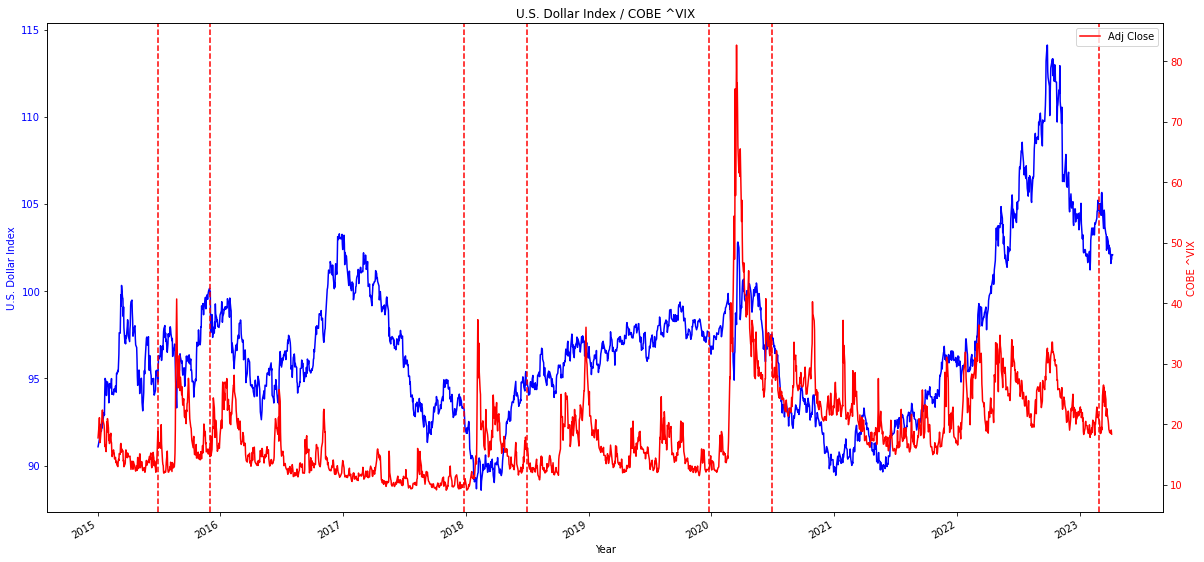

In [27]:
fig, ax1 = plt.subplots(figsize=(20,10))
dollar_index.plot(ax=ax1, color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('U.S. Dollar Index', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax1.axvline(pd.to_datetime('2015-07-01'), color='r', linestyle='--')
ax1.axvline(pd.to_datetime('2015-12-01'), color='r', linestyle='--')
ax1.axvline(pd.to_datetime('2017-12-25'), color='r', linestyle='--')
ax1.axvline(pd.to_datetime('2018-07-01'), color='r', linestyle='--')
ax1.axvline(pd.to_datetime('2019-12-25'), color='r', linestyle='--')
ax1.axvline(pd.to_datetime('2020-07-01'), color='r', linestyle='--')
ax1.axvline(pd.to_datetime('2023-03-01'), color='r', linestyle='--')

ax2 = ax1.twinx()
vix.plot(ax=ax2, color='red')
ax2.set_ylabel('COBE ^VIX', color='red')
ax2.tick_params(axis='y', labelcolor='red')
plt.title('U.S. Dollar Index / COBE ^VIX')
plt.legend()
plt.show()

## Chicago Fed National Financial Conditions Index / Wilshire 5000 Total Market Full Cap Index

In [28]:
financial_coditions_idex = web.DataReader("NFCI", "fred", start4 , end4)
Total_mcap = web.DataReader("WILL5000INDFC", "fred", start4 , end4)

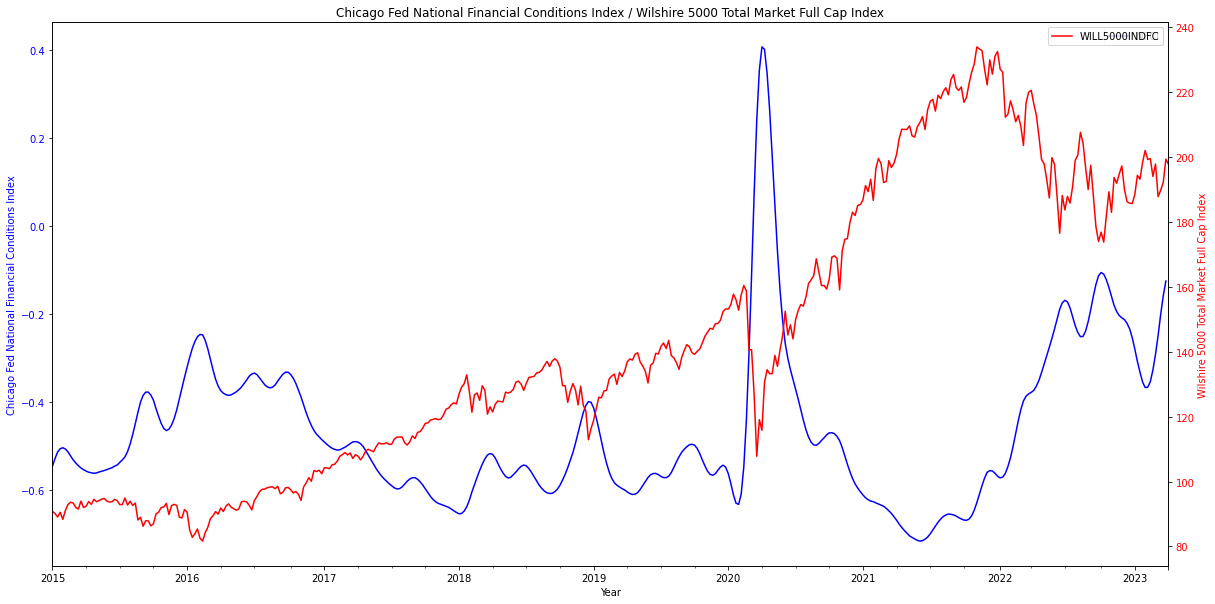

In [29]:
fig, ax1 = plt.subplots(figsize=(20,10))
financial_coditions_idex.plot(ax=ax1, color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Chicago Fed National Financial Conditions Index', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax2 = ax1.twinx()
Total_mcap.plot(ax=ax2, color='red')
ax2.set_ylabel('Wilshire 5000 Total Market Full Cap Index', color='red')
ax2.tick_params(axis='y', labelcolor='red')
plt.title('Chicago Fed National Financial Conditions Index / Wilshire 5000 Total Market Full Cap Index')
plt.legend()
plt.show()

## Commodities

In [30]:
gold = yf.download('GC=F', start, end, progress=False)['Adj Close']
silver = yf.download('SI=F', start, end, progress=False)['Adj Close']
oil = yf.download('CL=F', start, end, progress=False)['Adj Close']
copper = yf.download('HG=F', start, end, progress=False)['Adj Close']
natural_gas = yf.download('NG=F', start, end, progress=False)['Adj Close']

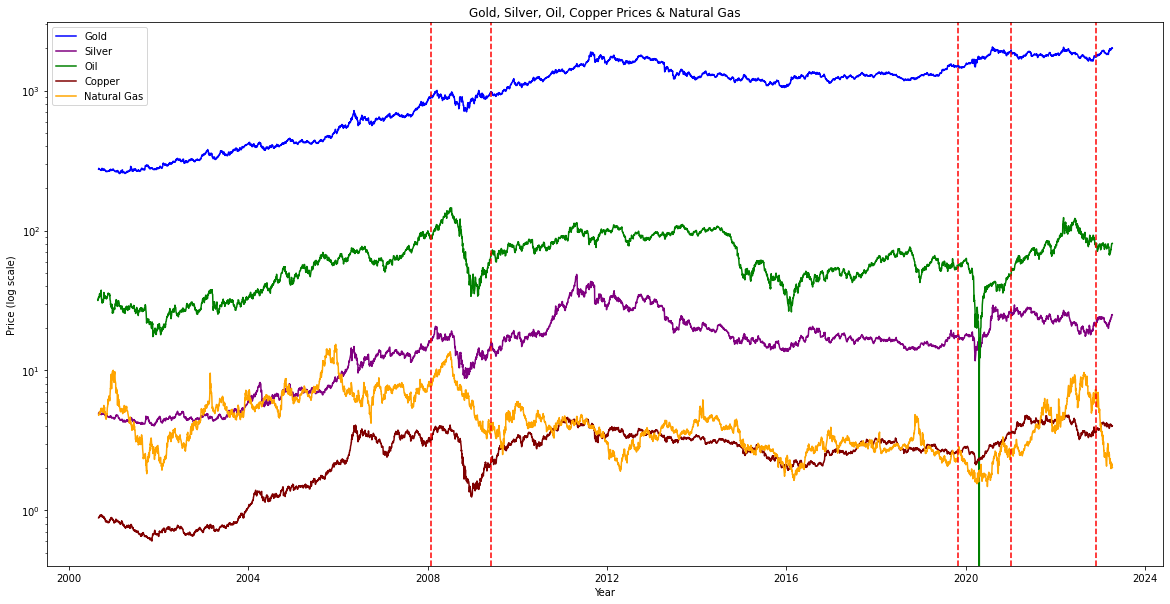

In [31]:
fig, ax = plt.subplots(figsize=(20,10))

# plot the data for gold, silver, oil, natural gas and copper prices on the same axis with prices in log scale
ax.semilogy(gold, label='Gold', color='blue')
ax.semilogy(silver, label='Silver', color='purple')
ax.semilogy(oil, label='Oil', color='green')
ax.semilogy(copper, label='Copper', color='maroon')
ax.semilogy(natural_gas, label='Natural Gas', color='orange')

ax.axvline(pd.to_datetime('2008-02-01'), color='r', linestyle='--')
ax.axvline(pd.to_datetime('2009-06-01'), color='r', linestyle='--')
ax.axvline(pd.to_datetime('2019-11-01'), color='r', linestyle='--')
ax.axvline(pd.to_datetime('2021-01-01'), color='r', linestyle='--')
ax.axvline(pd.to_datetime('2022-12-01'), color='r', linestyle='--')

ax.set_xlabel('Year')
ax.set_ylabel('Price (log scale)')
ax.legend()
plt.title('Gold, Silver, Oil, Copper Prices & Natural Gas')
plt.show()

### DISCLAIMER

This notebook is entirely informative. None of the content presented in this notebook constitutes a recommendation that any particular security, portfolio of securities, transaction or investment strategy is suitable for any specific person. Futures, stocks and options trading involves substantial risk of loss and is not suitable for every investor. The valuation of futures, stocks and options may fluctuate, and, as a result, clients may lose more than their original investment.

All trading strategies are used at your own risk.

Best,
Chrisler